<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/Shell_Moving_Average_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Simple moving average trading strategy

In [5]:
# Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [6]:
# Upload the data
files.upload()

Saving SHELL.csv to SHELL.csv


{'SHELL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n6/19/2023,2323,2358,2315,2340,2239.856934,14725904\r\n6/20/2023,2339.5,2345.725098,2309,2321.5,2222.148682,25853669\r\n6/21/2023,2319.5,2363.5,2319.5,2363.5,2262.351074,6968504\r\n6/22/2023,2358,2358,2324,2333.5,2233.635254,12103766\r\n6/23/2023,2326.5,2336,2291.5,2318.5,2219.2771,9107176\r\n6/26/2023,2332,2352.5,2289.5,2341,2240.814209,10383466\r\n6/27/2023,2351,2357.745117,2310.5,2319.5,2220.234619,15218123\r\n6/28/2023,2321.5,2336.5,2297.5,2323.5,2224.062988,10719622\r\n6/29/2023,2323.5,2344.889893,2314.5,2325.5,2225.977539,12445453\r\n6/30/2023,2334.5,2351.5,2329,2342.5,2242.25,12447479\r\n7/3/2023,2357.5,2404,2350,2379.5,2277.666504,16897005\r\n7/4/2023,2377,2390.5,2368,2380.5,2278.623535,6393436\r\n7/5/2023,2376,2377.659912,2320.5,2329,2229.327637,15663783\r\n7/6/2023,2312.5,2318.5,2264,2264.5,2167.588135,10705039\r\n7/7/2023,2256.5,2300.5,2251,2282.5,2184.817871,11206305\r\n7/10/2023,2291.5,2328.5,2289.5,2305,2206.3547

In [8]:
# Store the data
df = pd.read_csv('SHELL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/19/2023,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0
1,6/20/2023,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0
2,6/21/2023,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0
3,6/22/2023,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0
4,6/23/2023,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0


In [12]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2023-06-19,6/19/2023,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0
2023-06-20,6/20/2023,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0
2023-06-21,6/21/2023,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0
2023-06-22,6/22/2023,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0
2023-06-23,6/23/2023,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0


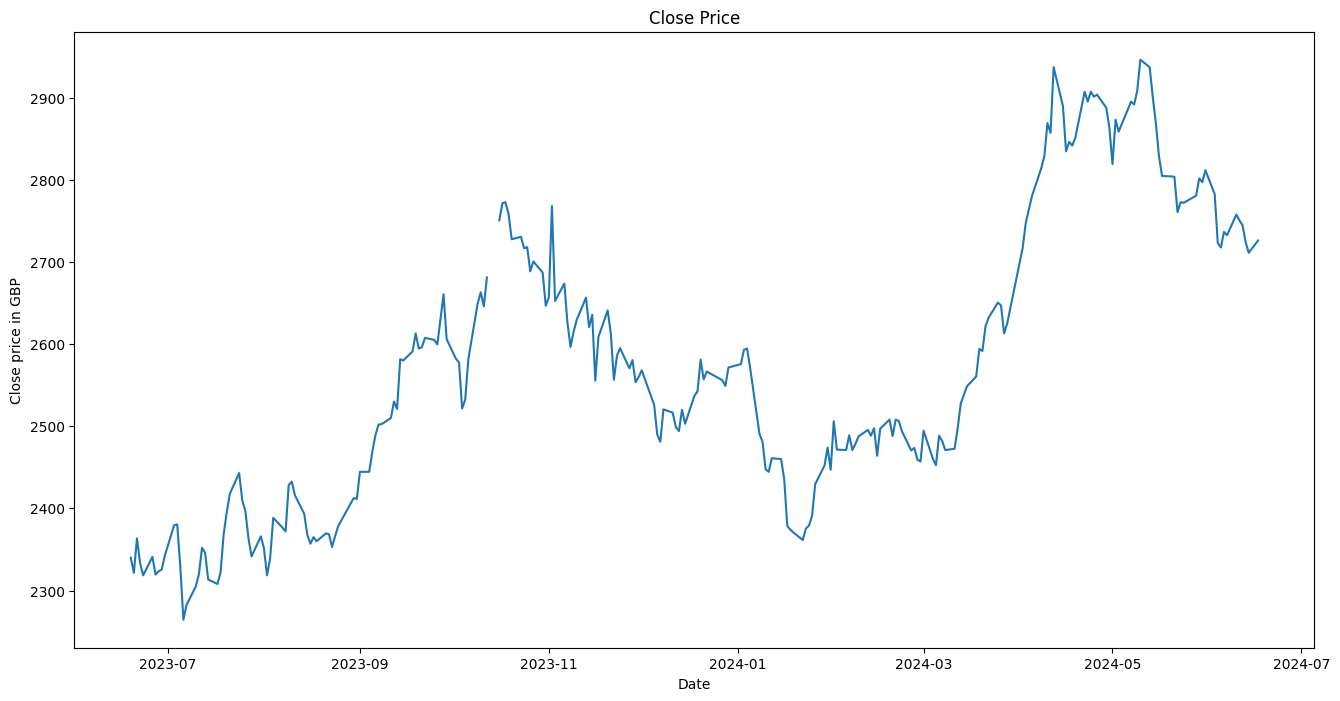

In [14]:
# Create a plot of the close price
plt.figure(figsize=(16,8))
plt.title('Shell Close Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price in GBP')
plt.show()


In [15]:
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

In [16]:
df['SMA30'] = SMA(df)

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA30
2023-06-19,6/19/2023,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0,NaN
2023-06-20,6/20/2023,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0,NaN
2023-06-21,6/21/2023,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0,NaN
2023-06-22,6/22/2023,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0,NaN
2023-06-23,6/23/2023,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0,NaN


In [27]:
def strategy(df):
  buy = []
  sell = []
  flag = 0
  buy_price = 0

  for i in range(0, len(df)):

    if df['SMA30'][i] > df['Close'][i] and flag == 0:
      buy.append(df['Close'][i])
      sell.append(np.nan)
      buy_price = df['Close'][i]
      flag = 1
    elif df['SMA30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
      sell.append(df['Close'][i])
      buy.append(np.nan)
      buy_price = 0
      flag  = 0
    else:
      sell.append(np.nan)
      buy.append(np.nan)

  return (buy,sell)


In [29]:
# Get the buy and sell list
strat = strategy(df)
df['Buy'] = strat[0]
df['Sell'] = strat[1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA30,Buy,Sell
2023-06-19,6/19/2023,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0,NaN,NaN,NaN
2023-06-20,6/20/2023,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0,NaN,NaN,NaN
2023-06-21,6/21/2023,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0,NaN,NaN,NaN
2023-06-22,6/22/2023,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0,NaN,NaN,NaN
2023-06-23,6/23/2023,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0,NaN,NaN,NaN


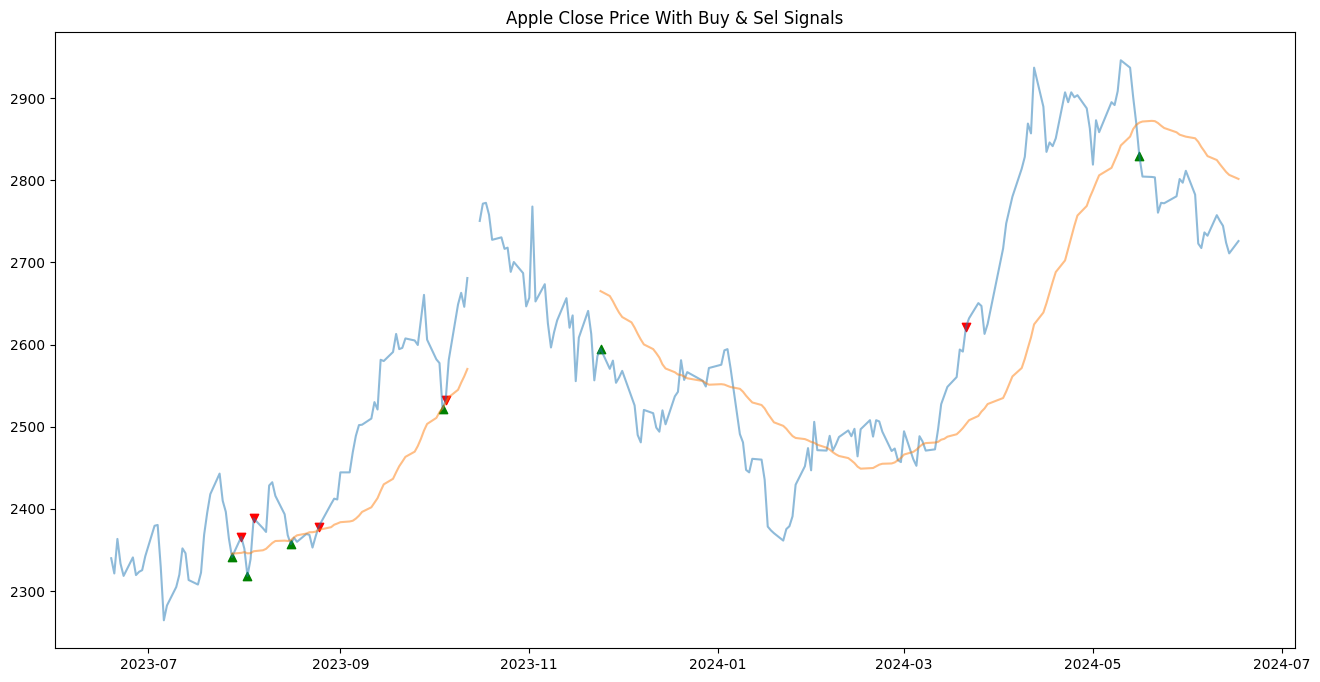

In [31]:
plt.figure(figsize=(16,8))
plt.title('Apple Close Price With Buy & Sel Signals')
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA30'], alpha =0.5, label='SMA30')
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker = '^',alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker = 'v', alpha = 1)
